In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load uncleaned kaggle dataset on Africa Economic, Banking and Systemic Crisis

In [26]:
df = pd.read_csv("https://raw.githubusercontent.com/Dee-M123/Africa-Economic-Banking-and-Systemic-Crisis/refs/heads/main/Data/raw/african_crises.csv")

df.head(3)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis


# **Removed columns not needed for project**

Columns 'case' and 'cc3' are not relevant for this project. Country is a solid and good enough a column to represent both.

In [27]:
df = df.drop(columns=['case', 'cc3'])

In [28]:
df.head(3)

,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis


# Handling duplicates

In [29]:
df.duplicated().sum()

np.int64(0)

In [30]:
df.duplicated(subset=['country', 'year']).sum()

np.int64(0)

droping duplicates, even though we have zero records- for the sake of the class

In [31]:
df = df.drop_duplicates(subset=['country', 'year'])

In [32]:
print("number of countries: ", df['country'].nunique())
print("list and value count of countries: ", df['country'].value_counts())

number of countries:  13
list and value count of countries:  country
Egypt                       155
South Africa                114
Zimbabwe                     90
Algeria                      85
Angola                       77
Morocco                      75
Tunisia                      75
Zambia                       72
Mauritius                    68
Kenya                        67
Ivory Coast                  63
Nigeria                      60
Central African Republic     58
Name: count, dtype: int64


# Dates

Looking at year continuity for each country, from start of reports.

In [33]:
df.groupby('country')['year'].agg(['min','max','count'])

,min,max,count
country,,,
Algeria,1870,2014,85
Angola,1921,2014,77
Central African Republic,1957,2014,58
Egypt,1860,2014,155
Ivory Coast,1952,2014,63
Kenya,1948,2014,67
Mauritius,1947,2014,68
Morocco,1940,2014,75
Nigeria,1954,2014,60


In [34]:
df['inflation_annual_cpi'].describe()

,inflation_annual_cpi
count,1.059000e+03
mean,2.084889e+04
std,6.757274e+05
min,-2.850214e+01
25%,2.086162e+00
50%,5.762330e+00
75%,1.164405e+01
max,2.198970e+07


# Handling missing values

In [35]:
# checking for missing values
df.isnull().mean()

,0
country,0.0
year,0.0
systemic_crisis,0.0
exch_usd,0.0
domestic_debt_in_default,0.0
sovereign_external_debt_default,0.0
gdp_weighted_default,0.0
inflation_annual_cpi,0.0
independence,0.0
currency_crises,0.0


Every countries must have an exchange rate, having zero as min might need future inspection and cleaning

In [36]:
df['exch_usd'].describe()

,exch_usd
count,1059.000000
mean,43.140831
std,111.475380
min,0.000000
25%,0.195350
50%,0.868400
75%,8.462750
max,744.306139


In [37]:
df[df['exch_usd'] <= 0]

,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
220,Ivory Coast,1952,0,0.0,0,0,0.0,16.216100,0,0,0,no_crisis
221,Ivory Coast,1953,0,0.0,0,0,0.0,2.326185,0,0,0,no_crisis
222,Ivory Coast,1954,0,0.0,0,0,0.0,-2.273304,0,0,0,no_crisis
223,Ivory Coast,1955,0,0.0,0,0,0.0,2.326185,0,0,0,no_crisis
224,Ivory Coast,1956,0,0.0,0,0,0.0,4.544795,0,0,0,no_crisis
225,Ivory Coast,1957,0,0.0,0,0,0.0,13.043403,0,0,0,no_crisis
226,Ivory Coast,1958,0,0.0,0,0,0.0,21.154761,0,0,1,no_crisis
227,Ivory Coast,1959,0,0.0,0,0,0.0,6.348282,0,0,0,no_crisis
228,Ivory Coast,1960,0,0.0,0,0,0.0,-2.152483,1,0,0,no_crisis
229,Ivory Coast,1961,0,0.0,0,0,0.0,14.430330,1,0,0,no_crisis


In [38]:
#checking if we have valid entries for countries that invalid entries
df[(df['exch_usd'] >0) & (df["country"].isin(["Ivory Coast","Nigeria"]))]

,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
238,Ivory Coast,1970,0,278.0000,0,0,0.0,8.075117,1,0,0,no_crisis
239,Ivory Coast,1971,0,264.0000,0,0,0.0,-1.072256,1,0,0,no_crisis
240,Ivory Coast,1972,0,255.5000,0,0,0.0,1.194615,1,0,0,no_crisis
241,Ivory Coast,1973,0,238.0000,0,0,0.0,12.932574,1,0,0,no_crisis
242,Ivory Coast,1974,0,222.0000,0,0,0.0,18.224183,1,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...
703,Nigeria,2010,1,150.6617,0,0,0.0,13.720000,1,0,0,crisis
704,Nigeria,2011,1,158.2670,0,0,0.0,10.841000,1,0,0,crisis
705,Nigeria,2012,1,155.2700,0,0,0.0,12.225000,1,0,0,crisis
706,Nigeria,2013,1,155.2000,0,0,0.0,8.495000,1,0,0,crisis


Looking for trends in the invalid

/tmp/ipython-input-502/1110815050.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nigeria['invalid_exch'] = (nigeria['exch_usd'] <= 0).astype(int)


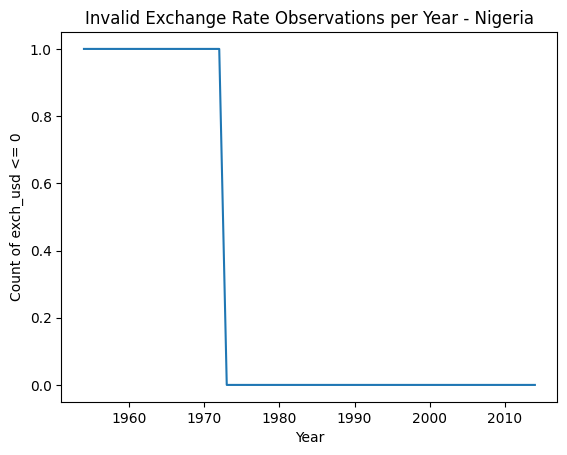

In [39]:

nigeria = df[df['country'] == 'Nigeria']

# Create invalid flag
nigeria['invalid_exch'] = (nigeria['exch_usd'] <= 0).astype(int)

# Group by year
nigeria_invalid = nigeria.groupby('year')['invalid_exch'].sum()

# Plot
plt.figure()
plt.plot(nigeria_invalid)
plt.title("Invalid Exchange Rate Observations per Year - Nigeria")
plt.xlabel("Year")
plt.ylabel("Count of exch_usd <= 0")
plt.show()

/tmp/ipython-input-502/806334006.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nigeria['valid_exch'] = (nigeria['exch_usd'] > 0).astype(int)


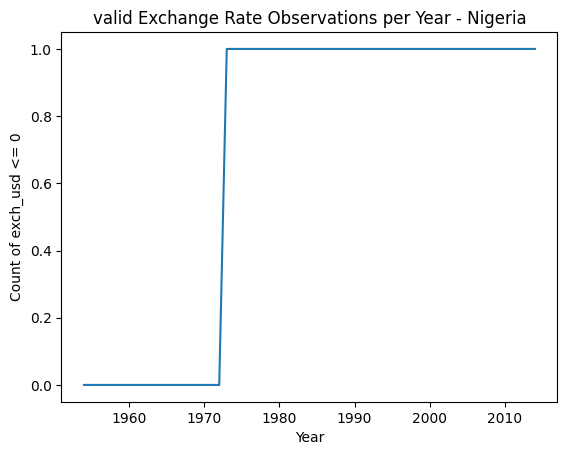

In [40]:
nigeria = df[df['country'] == 'Nigeria']

# Create invalid flag
nigeria['valid_exch'] = (nigeria['exch_usd'] > 0).astype(int)

# Group by year
nigeria_valid = nigeria.groupby('year')['valid_exch'].sum()

# Plot
plt.figure()
plt.plot(nigeria_valid)
plt.title("valid Exchange Rate Observations per Year - Nigeria")
plt.xlabel("Year")
plt.ylabel("Count of exch_usd <= 0")
plt.show()

The invalid entries are from a period of indepence struggles, do go out colonial rule.

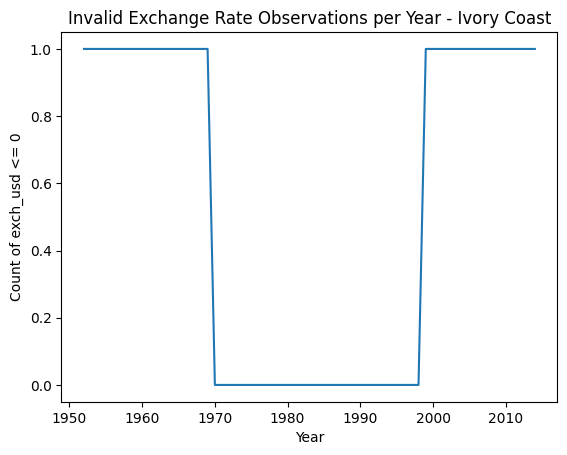

In [41]:
# Filter Ivory Coast
ivory_coast = df[df['country'] == 'Ivory Coast'].copy()

# Create invalid flag
ivory_coast['invalid_exch'] = (ivory_coast['exch_usd'] <= 0).astype(int)

# Group by year
ivory_invalid = ivory_coast.groupby('year')['invalid_exch'].sum()

# Plot
plt.figure()
plt.plot(ivory_invalid)
plt.title("Invalid Exchange Rate Observations per Year - Ivory Coast")
plt.xlabel("Year")
plt.ylabel("Count of exch_usd <= 0")
plt.show()

The same for Ivory Coast and in the 2000s they had civil wars

For now, I turn the zero entries to null values and see how to work on them later

In [42]:
df.loc[df['exch_usd'] == 0, 'exch_usd'] = np.nan

In [43]:
print("Nigeria missing values: ", df[df['country'] == 'Nigeria'].isnull().mean()*100)

Nigeria missing values:  country                             0.000000
year                                0.000000
systemic_crisis                     0.000000
exch_usd                           31.666667
domestic_debt_in_default            0.000000
sovereign_external_debt_default     0.000000
gdp_weighted_default                0.000000
inflation_annual_cpi                0.000000
independence                        0.000000
currency_crises                     0.000000
inflation_crises                    0.000000
banking_crisis                      0.000000
dtype: float64


In [44]:
print("Ivory coast missing values: ", df[df['country'] == 'Ivory Coast'].isnull().mean()*100)

# will probably have to drop this

Ivory coast missing values:  country                             0.000000
year                                0.000000
systemic_crisis                     0.000000
exch_usd                           53.968254
domestic_debt_in_default            0.000000
sovereign_external_debt_default     0.000000
gdp_weighted_default                0.000000
inflation_annual_cpi                0.000000
independence                        0.000000
currency_crises                     0.000000
inflation_crises                    0.000000
banking_crisis                      0.000000
dtype: float64


# Binary columns to numeric

In [45]:
df['banking_crisis'] = df['banking_crisis'].map({'crisis': 1,'no_crisis': 0})

# Save cleaned dataset

In [46]:
df.to_csv("african_crises_cleaned.csv", index=False)

In [47]:
!git clone https://github.com/Dee-M123/Africa-Economic-Banking-and-Systemic-Crisis.git

fatal: destination path 'Africa-Economic-Banking-and-Systemic-Crisis' already exists and is not an empty directory.
